In [313]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import StackingClassifier


In [314]:
df_V1=pd.read_csv("Data/Preprocessed/Rockburst_in_Tunnel_V1.csv")
df_V2=pd.read_csv("Data/Preprocessed/Rockburst_in_Tunnel_V2.csv")
df_V3=pd.read_csv("Data/Preprocessed/Rockburst_in_Tunnel_V3.csv")

In [315]:
exclude_cols = ["Intensity_Level","Intensity_Level_encoded"]           
features_V1 = [col for col in df_V1.columns if col not in exclude_cols]

In [316]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def train_models(df, dataset_name, features):
    # 1. Features & Target
    X = df[features]
    y = df['Intensity_Level_encoded']

    # Split
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 2. Models
    models = {
        "Logistic Regression": LogisticRegression(max_iter=5000),
        "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
        "SVM": SVC(kernel='rbf', probability=True, random_state=42),
        "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
    }

    # 3. Ensemble Model (Stacking)
    base_learners = [
        ('lr', LogisticRegression(max_iter=5000)),
        ('xgb', XGBClassifier(eval_metric='mlogloss', random_state=42)),
        ('rf', RandomForestClassifier(n_estimators=200, random_state=42))
    ]
    
    meta_model = XGBClassifier(eval_metric='mlogloss', random_state=42)
    
    ensemble = StackingClassifier(
        estimators=base_learners,
        final_estimator=meta_model,
        cv=5
    )
    models["Ensemble Stacking"] = ensemble

    results = {}

    # 4. Training & Evaluation
    for name, model in models.items():
        model.fit(X_train_scaled, y_train)
        preds = model.predict(X_test_scaled)
        acc = accuracy_score(y_test, preds)
        results[name] = acc

        print(f"\n=== {dataset_name} | {name} ===")
        print("Accuracy:", round(acc, 4))
        print("Classification Report:\n", classification_report(y_test, preds))

        # Confusion Matrix
        cm = confusion_matrix(y_test, preds)
        plt.figure(figsize=(5,4))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=np.unique(y),
                    yticklabels=np.unique(y))
        plt.title(f"{dataset_name} - {name} | Confusion Matrix")
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.show()

    # 5. Accuracy Comparison
    plt.figure(figsize=(8,5))
    models_name = list(results.keys())
    performance = list(results.values())
    sns.barplot(x=models_name, y=performance, palette='viridis', hue=models_name, legend=False)
    plt.ylabel("Accuracy")
    plt.title("Model Accuracy Comparison")
    plt.ylim(0, 1)
    plt.show()

    models_df = pd.DataFrame({
        "Model": models_name,
        "Accuracy": performance
    })

    return models_df, models, scaler


In [317]:
# def train_models(df, dataset_name,features):
#     # 1. Features & Target
#     X = df[features]
#     y = df['Intensity_Level_encoded']

#     # Split
#     X_train, X_test, y_train, y_test = train_test_split(
#         X, y, test_size=0.2, random_state=42, stratify=y
#     )

#     # 2. Models
#     models = {
#         "Logistic Regression": LogisticRegression(max_iter=5000),
#         "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
#         "SVM": SVC(kernel='rbf', probability=True, random_state=42),
#         "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
#     }

#     results = {}

#     # 3. Training & Evaluation
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         preds = model.predict(X_test)
#         acc = accuracy_score(y_test, preds)
#         results[name] = acc

#         print(f"\n=== {dataset_name} | {name} ===")
#         print("Accuracy:", round(acc, 4))
#         print("Classification Report:\n", classification_report(y_test, preds))

#         # Confusion Matrix
#         cm = confusion_matrix(y_test, preds)
#         plt.figure(figsize=(5,4))
#         sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
#                     xticklabels=np.unique(y),
#                     yticklabels=np.unique(y))
#         plt.title(f"{dataset_name} - {name} | Confusion Matrix")
#         plt.xlabel("Predicted")
#         plt.ylabel("Actual")
#         plt.show()

#     # Accuracy Comparison
#     plt.figure(figsize=(8,5))
#     models_name=list(results.keys())
#     performance=list(results.values())
#     sns.barplot(x=models_name, y=performance, palette='viridis',hue=models_name,legend=False)
#     plt.ylabel("Accuracy")
#     plt.title("Model Accuracy Comparison")
#     plt.ylim(0, 1)
#     plt.show()
#     models_df = pd.DataFrame({
#         "Model": models_name,
#         "Accuracy": performance
#     })

#     return models_df,models



=== RockBurst V1 | Logistic Regression ===
Accuracy: 0.6316
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.33      0.40      0.36         5
           2       0.60      0.60      0.60         5
           3       1.00      0.50      0.67         2

    accuracy                           0.63        19
   macro avg       0.70      0.59      0.62        19
weighted avg       0.67      0.63      0.64        19



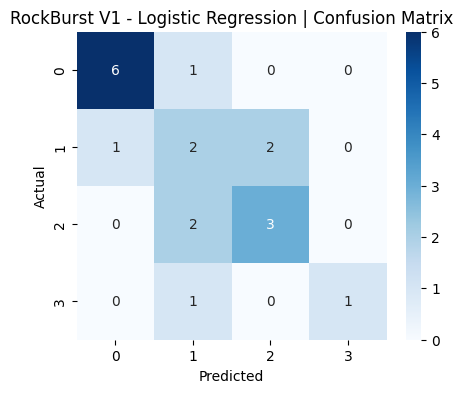


=== RockBurst V1 | Random Forest ===
Accuracy: 0.6316
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.50      0.40      0.44         5
           2       0.80      0.80      0.80         5
           3       1.00      0.50      0.67         2

    accuracy                           0.63        19
   macro avg       0.71      0.60      0.63        19
weighted avg       0.65      0.63      0.63        19



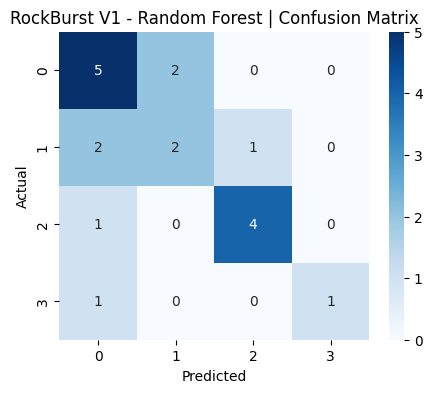


=== RockBurst V1 | SVM ===
Accuracy: 0.7368
Classification Report:
               precision    recall  f1-score   support

           0       0.78      1.00      0.88         7
           1       0.67      0.40      0.50         5
           2       0.67      0.80      0.73         5
           3       1.00      0.50      0.67         2

    accuracy                           0.74        19
   macro avg       0.78      0.68      0.69        19
weighted avg       0.74      0.74      0.72        19



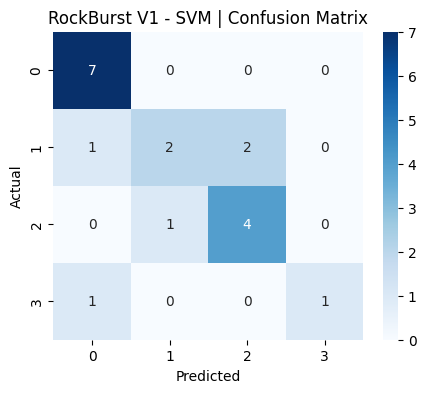


=== RockBurst V1 | XGBoost ===
Accuracy: 0.5263
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.33      0.20      0.25         5
           2       0.50      0.60      0.55         5
           3       1.00      0.50      0.67         2

    accuracy                           0.53        19
   macro avg       0.60      0.50      0.52        19
weighted avg       0.53      0.53      0.51        19



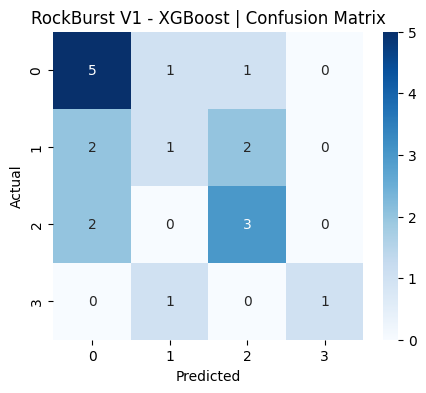


=== RockBurst V1 | Ensemble Stacking ===
Accuracy: 0.5789
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.40      0.40      0.40         5
           2       0.50      0.60      0.55         5
           3       1.00      0.50      0.67         2

    accuracy                           0.58        19
   macro avg       0.65      0.55      0.58        19
weighted avg       0.61      0.58      0.58        19



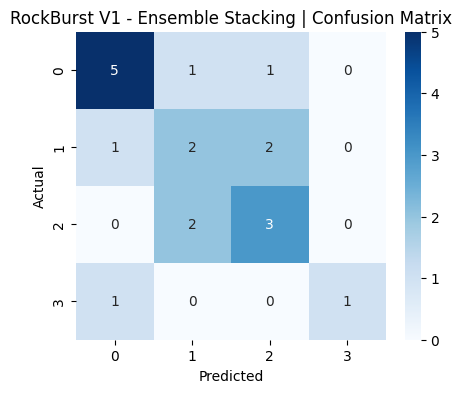

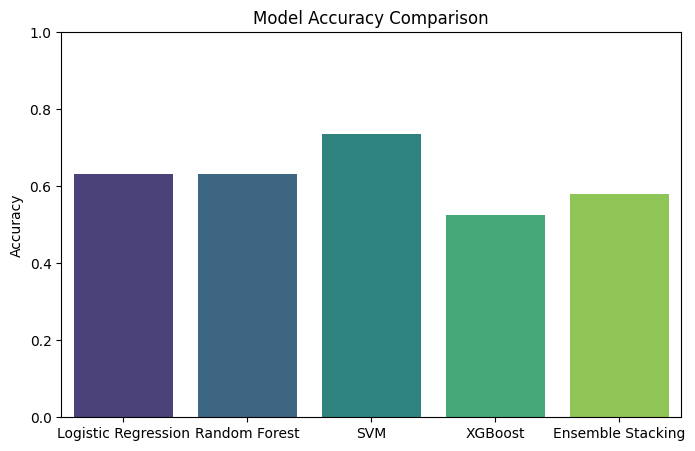

In [318]:
results_df_V1,models_V1,scaler_V1=train_models(df_V1,"RockBurst V1",features_V1)

In [319]:
# results_df_V1,models_V1=train_models(df_V1,"RockBurst V1",features_V1)

In [320]:
results_df_V1.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
2,SVM,0.736842
0,Logistic Regression,0.631579
1,Random Forest,0.631579
4,Ensemble Stacking,0.578947
3,XGBoost,0.526316


In [321]:
df_V2.columns

Index(['Energy_Unit_log', 'Event_freq_unit_per_day_log', 'Duration_days_log',
       'Energy_per_Volume_log', 'Energy_density_Joule', 'Volume_m3',
       'Energy_Joule_per_day', 'Volume_m3_per_day', 'Intensity_Level_encoded',
       'Intensity_Level'],
      dtype='object')

In [322]:
exclude_cols = ["Intensity_Level","Intensity_Level_encoded"]           
features_V2 = [col for col in df_V2.columns if col not in exclude_cols]

In [323]:
features_V2

['Energy_Unit_log',
 'Event_freq_unit_per_day_log',
 'Duration_days_log',
 'Energy_per_Volume_log',
 'Energy_density_Joule',
 'Volume_m3',
 'Energy_Joule_per_day',
 'Volume_m3_per_day']


=== RockBurst V2 | Logistic Regression ===
Accuracy: 0.5789
Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.71      0.71         7
           1       0.33      0.40      0.36         5
           2       0.60      0.60      0.60         5
           3       1.00      0.50      0.67         2

    accuracy                           0.58        19
   macro avg       0.66      0.55      0.59        19
weighted avg       0.61      0.58      0.59        19



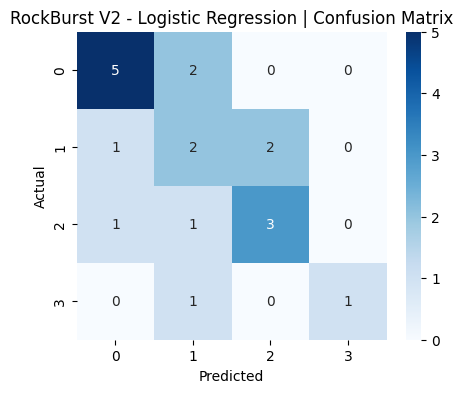


=== RockBurst V2 | Random Forest ===
Accuracy: 0.6316
Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.71      0.62         7
           1       0.50      0.40      0.44         5
           2       0.80      0.80      0.80         5
           3       1.00      0.50      0.67         2

    accuracy                           0.63        19
   macro avg       0.71      0.60      0.63        19
weighted avg       0.65      0.63      0.63        19



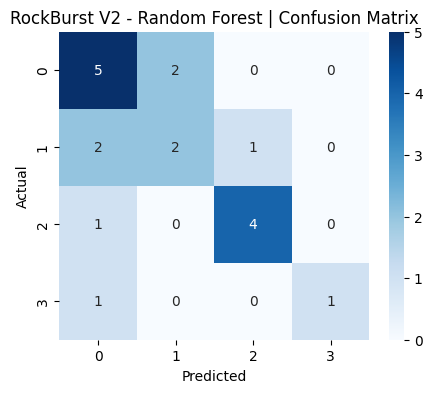


=== RockBurst V2 | SVM ===
Accuracy: 0.6316
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.40      0.40      0.40         5
           2       0.60      0.60      0.60         5
           3       1.00      0.50      0.67         2

    accuracy                           0.63        19
   macro avg       0.69      0.59      0.62        19
weighted avg       0.64      0.63      0.63        19



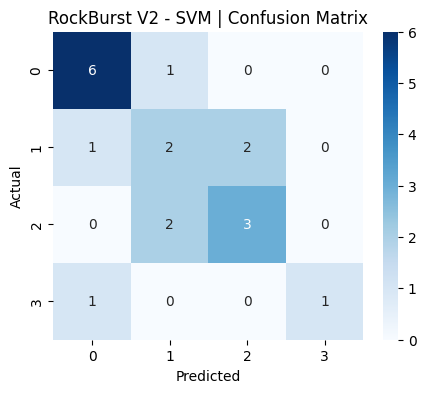


=== RockBurst V2 | XGBoost ===
Accuracy: 0.5263
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.71      0.59         7
           1       0.50      0.20      0.29         5
           2       0.50      0.60      0.55         5
           3       1.00      0.50      0.67         2

    accuracy                           0.53        19
   macro avg       0.62      0.50      0.52        19
weighted avg       0.55      0.53      0.51        19



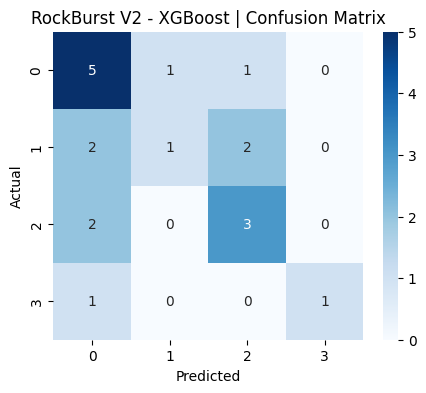


=== RockBurst V2 | Ensemble Stacking ===
Accuracy: 0.6842
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.86      0.80         7
           1       0.50      0.60      0.55         5
           2       0.75      0.60      0.67         5
           3       1.00      0.50      0.67         2

    accuracy                           0.68        19
   macro avg       0.75      0.64      0.67        19
weighted avg       0.71      0.68      0.68        19



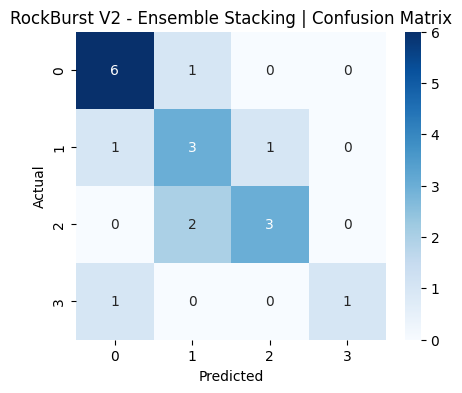

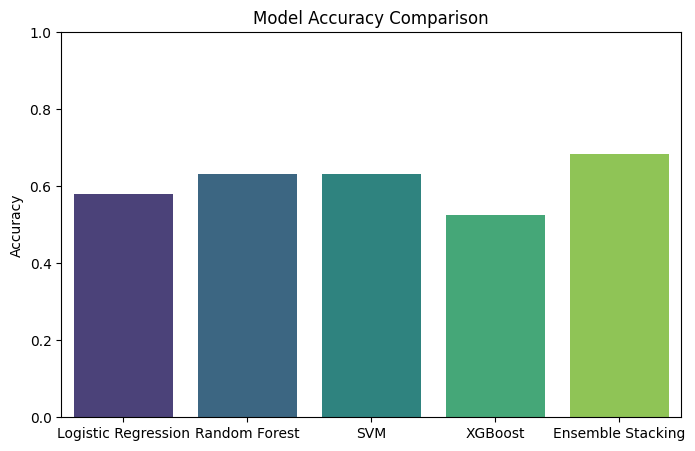

In [324]:
results_df_V2,models_V2,scaler_V2=train_models(df_V2,"RockBurst V2",features_V2)

In [325]:
# results_df_V2,models_V2=train_models(df_V2,"RockBurst V2",features_V2)

In [326]:
results_df_V2.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
4,Ensemble Stacking,0.684211
2,SVM,0.631579
1,Random Forest,0.631579
0,Logistic Regression,0.578947
3,XGBoost,0.526316


In [327]:
df_V3.columns

Index(['Unnamed: 0', 'Energy_Unit_log', 'Event_freq_unit_per_day_log',
       'Duration_days_log', 'Energy_per_Volume_log', 'Energy_density_Joule',
       'Volume_m3', 'Energy_Joule_per_day', 'Volume_m3_per_day',
       'Intensity_Level_encoded'],
      dtype='object')

In [328]:
df_V3.tail()

,Unnamed: 0,Energy_Unit_log,Event_freq_unit_per_day_log,Duration_days_log,Energy_per_Volume_log,Energy_density_Joule,Volume_m3,Energy_Joule_per_day,Volume_m3_per_day,Intensity_Level_encoded
245,245,1.942653,0.408596,2.560004,0.819181,4.593348,4.742810,3.508512,3.665260,0
246,246,2.783577,0.981324,2.311594,1.380743,6.396826,5.033156,5.534632,4.192567,3
247,247,1.247006,0.700075,1.386992,0.559465,2.795297,3.370552,2.357605,2.666544,0
248,248,2.076381,0.534777,2.394108,0.896831,5.265691,4.812511,4.280792,3.808660,1
249,249,1.394867,0.384011,2.479389,0.480141,3.498450,4.848676,2.472906,3.807009,0


In [329]:
exclude_cols = ['Unnamed: 0','Intensity_Level_encoded']           
features_V3 = [col for col in df_V3.columns if col not in exclude_cols]

In [330]:
features_V3

['Energy_Unit_log',
 'Event_freq_unit_per_day_log',
 'Duration_days_log',
 'Energy_per_Volume_log',
 'Energy_density_Joule',
 'Volume_m3',
 'Energy_Joule_per_day',
 'Volume_m3_per_day']


=== RockBurst V3 | Logistic Regression ===
Accuracy: 0.84
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.73      0.67      0.70        12
           2       0.87      1.00      0.93        13
           3       1.00      1.00      1.00        12

    accuracy                           0.84        50
   macro avg       0.84      0.84      0.84        50
weighted avg       0.83      0.84      0.84        50



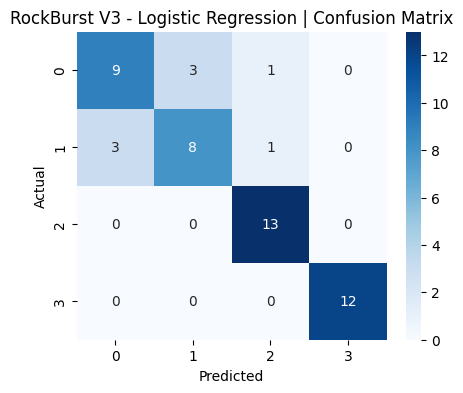


=== RockBurst V3 | Random Forest ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



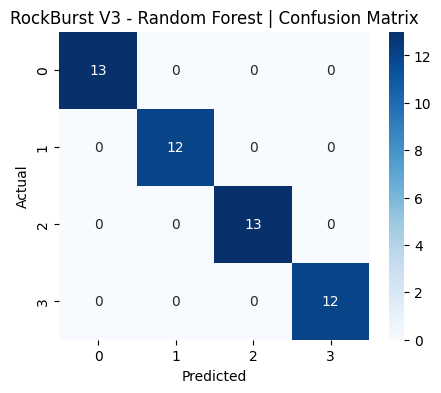


=== RockBurst V3 | SVM ===
Accuracy: 0.9
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.77      0.87        13
           1       0.79      0.92      0.85        12
           2       0.86      0.92      0.89        13
           3       1.00      1.00      1.00        12

    accuracy                           0.90        50
   macro avg       0.91      0.90      0.90        50
weighted avg       0.91      0.90      0.90        50



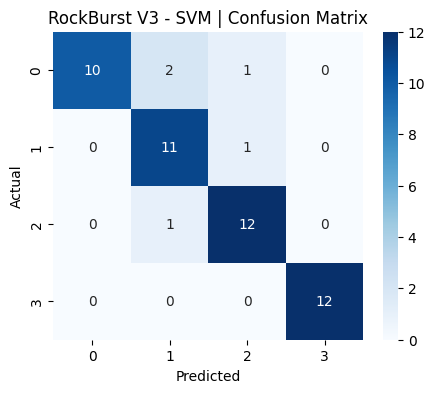


=== RockBurst V3 | XGBoost ===
Accuracy: 0.96
Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        13
           1       0.92      0.92      0.92        12
           2       1.00      0.92      0.96        13
           3       1.00      1.00      1.00        12

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



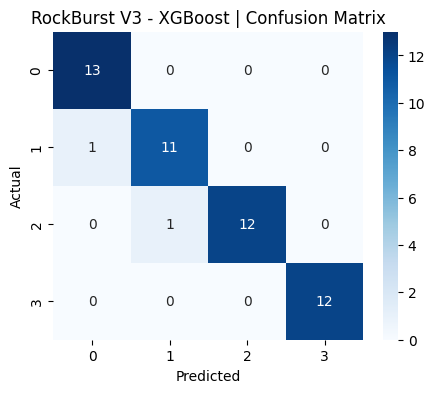


=== RockBurst V3 | Ensemble Stacking ===
Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        12
           2       1.00      1.00      1.00        13
           3       1.00      1.00      1.00        12

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



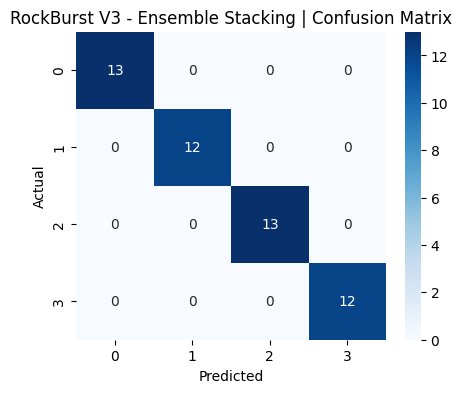

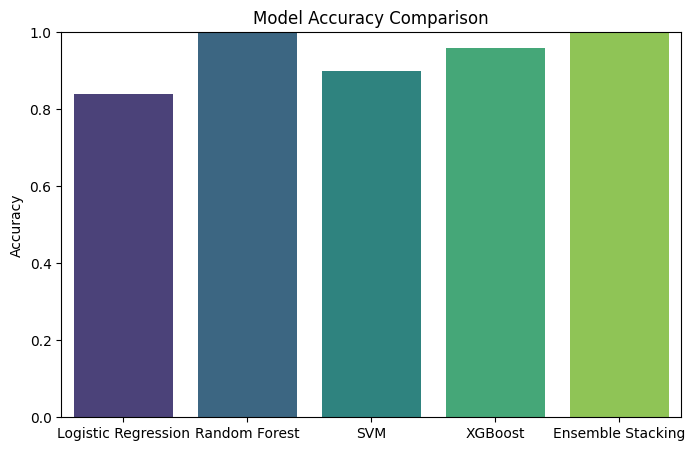

In [331]:
results_df_V3,models_V3,scaler_V3=train_models(df_V3,"RockBurst V3",features_V3)

In [332]:
# results_df_V3,models_V3=train_models(df_V3,"RockBurst V3",features_V3)

In [333]:
results_df_V3.sort_values(by="Accuracy",ascending=False)

,Model,Accuracy
1,Random Forest,1.00
4,Ensemble Stacking,1.00
3,XGBoost,0.96
2,SVM,0.90
0,Logistic Regression,0.84


In [334]:
results_df_V1['Version'] = 'V1'
results_df_V2['Version'] = 'V2'
results_df_V3['Version'] = 'V3'

results_df_all = pd.concat([results_df_V1, results_df_V2, results_df_V3], ignore_index=True)


In [335]:
results_df_all

,Model,Accuracy,Version
0,Logistic Regression,0.631579,V1
1,Random Forest,0.631579,V1
2,SVM,0.736842,V1
3,XGBoost,0.526316,V1
4,Ensemble Stacking,0.578947,V1
5,Logistic Regression,0.578947,V2
6,Random Forest,0.631579,V2
7,SVM,0.631579,V2
8,XGBoost,0.526316,V2
9,Ensemble Stacking,0.684211,V2


In [336]:
df_wide = results_df_all.pivot(index='Model', columns='Version', values='Accuracy')

In [337]:
df_wide.reindex()

Version,V1,V2,V3
Model,,,
Ensemble Stacking,0.578947,0.684211,1.00
Logistic Regression,0.631579,0.578947,0.84
Random Forest,0.631579,0.631579,1.00
SVM,0.736842,0.631579,0.90
XGBoost,0.526316,0.526316,0.96


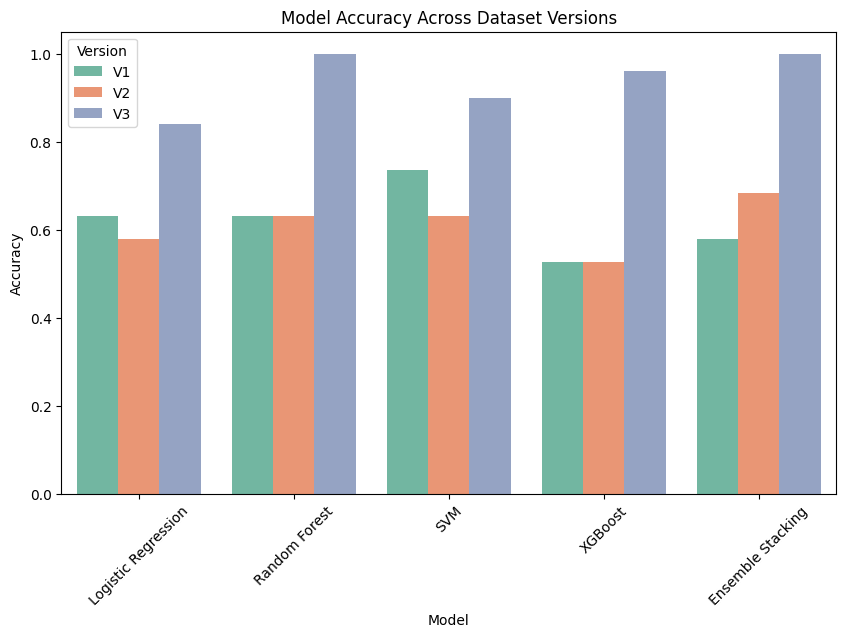

In [338]:
plt.figure(figsize=(10,6))
sns.barplot(data=results_df_all, x="Model", y="Accuracy", hue="Version", palette="Set2")
plt.title("Model Accuracy Across Dataset Versions")
plt.ylim(0, 1.05)
plt.xticks(rotation=45)
plt.show()


# Saving Best Model

In [339]:
print(type(models_V3))


<class 'dict'>


In [340]:
import joblib

# Save model + features list
joblib.dump((models_V3["XGBoost"], features_V3), "trained_models/All_Models/xgboost_model_V3.pkl")
joblib.dump((models_V3["Random Forest"],features_V3), "trained_models/All_Models/Random_Forest_model_V3.pkl")
joblib.dump((models_V3["SVM"],features_V3), "trained_models/All_Models/SVM_model_V3.pkl")
joblib.dump((models_V3["Logistic Regression"],features_V3), "trained_models/All_Models/Log_Regression_model_V3.pkl")
joblib.dump((models_V3["Ensemble Stacking"],features_V3), "trained_models/All_Models/ensemble_model_V3.pkl")

# Saving Scaler of V3
joblib.dump(scaler_V3, "trained_models/scaler_V3.pkl")


['trained_models/scaler_V3.pkl']

# Applying Cross Validation to check overfitting of best models 

In [341]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

X = df_V3[features_V3]
y = df_V3["Intensity_Level_encoded"]

In [342]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=5000),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True, random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', random_state=42)
}

# Stratified K-Fold CV
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Version 3 Cross-Validation Results")
for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"{name}: Mean Acc = {np.mean(scores):.4f}, Std Dev = {np.std(scores):.4f}, Folds = {scores}")


Version 3 Cross-Validation Results
Logistic Regression: Mean Acc = 0.7680, Std Dev = 0.0466, Folds = [0.76 0.8  0.8  0.68 0.8 ]
Random Forest: Mean Acc = 1.0000, Std Dev = 0.0000, Folds = [1. 1. 1. 1. 1.]
SVM: Mean Acc = 0.7760, Std Dev = 0.0320, Folds = [0.78 0.74 0.82 0.8  0.74]
XGBoost: Mean Acc = 0.9720, Std Dev = 0.0160, Folds = [1.   0.98 0.96 0.96 0.96]


In [343]:
# from sklearn.model_selection import learning_curve

# #Learning curve function 
# def plot_learning_curve(estimator, X, y, title):
#     train_sizes, train_scores, test_scores = learning_curve(
#         estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1,
#         train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
#     )
#     train_mean = np.mean(train_scores, axis=1)
#     test_mean = np.mean(test_scores, axis=1)

#     plt.figure(figsize=(8, 5))
#     plt.plot(train_sizes, train_mean, 'o-', label="Training Accuracy")
#     plt.plot(train_sizes, test_mean, 'o-', label="Validation Accuracy")
#     plt.title(title)
#     plt.xlabel("Training Set Size")
#     plt.ylabel("Accuracy")
#     plt.ylim(0.7, 1.05)
#     plt.legend()
#     plt.grid(True)
#     plt.show()

# # Plot curves 
# plot_learning_curve(RandomForestClassifier(n_estimators=200, random_state=42),
#                     X, y, "Random Forest - Learning Curve (V3)")

# plot_learning_curve(XGBClassifier(eval_metric='mlogloss', random_state=42),
#                     X, y, "XGBoost - Learning Curve (V3)")


# There is no overfitting in models as our data is so strong coorelated and balanced that model generalized very well